compute average connectivity between networks. two ways for that. we take approach 1.
1. compute network average time series, then network correlation
2. take correlation between pair seeds, then average on networks. COMPUTATION HEAVY.

In [136]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
EPOCHS = ['baseline', 'early', 'late']

In [4]:
import pandas as pd

# the list of subjects, removed erroneous ones
subjects = pd.read_csv('data/subjects.csv')
S = subjects.int_id

In [6]:
# compute average timeseries within networks. for each subject

In [ ]:
# load regions and networks

In [124]:
regions_networks = pd.read_csv('data/regions_sorted.csv')
regions_networks = regions_networks.set_index('region')[['7net', '17net']]
regions_networks

,7net,17net
region,,
7Networks_LH_Vis_1,Vis,DorsAttnA
7Networks_LH_Vis_2,Vis,VisCent
7Networks_LH_Vis_3,Vis,DorsAttnA
7Networks_LH_Vis_4,Vis,VisCent
7Networks_LH_Vis_5,Vis,DefaultC
...,...,...
Right Putamen,Striatum,StriatumRight
Right Pallidum,Striatum,StriatumRight
Right Hippocampus,Striatum,StriatumRight


# 7 networks

<AxesSubplot: xlabel='7net', ylabel='count'>

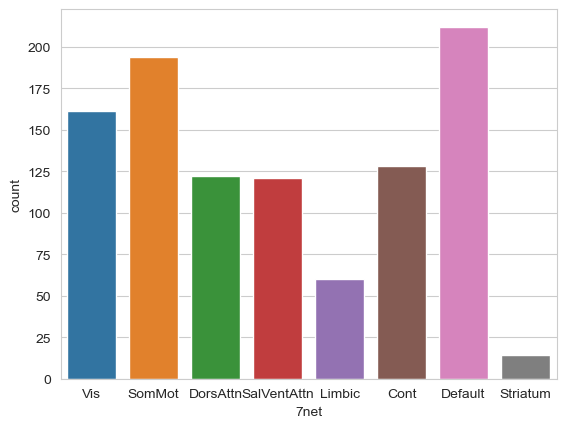

In [281]:
import seaborn

seaborn.countplot(x='7net', data=regions_networks)

In [16]:
# merge region with networks

In [7]:
# in data/ts/ we don't have cerebellum regions included. only 1012 regions.
def timeseries(subject, epoch): return pd.read_csv('data/ts/ts_'+str(subject)+'_'+epoch+'.csv')

In [47]:
timeseries(2, 'early')

,7Networks_LH_Vis_1,7Networks_LH_Vis_2,7Networks_LH_Vis_3,7Networks_LH_Vis_4,7Networks_LH_Vis_5,7Networks_LH_Vis_6,7Networks_LH_Vis_7,7Networks_LH_Vis_8,7Networks_LH_Vis_9,7Networks_LH_Vis_10,...,Left Hippocampus,Left Amygdala,Left Accumbens,Right Thalamus,Right Caudate,Right Putamen,Right Pallidum,Right Hippocampus,Right Amygdala,Right Accumbens
0,1.014596,-1.091588,-0.689694,1.241627,-0.340570,1.720721,0.967533,2.293730,2.010316,0.412217,...,-1.041489,-0.267003,-1.416582,-0.402665,-0.300350,-1.430332,-2.075004,-1.319881,-1.408298,-0.569785
1,-0.017981,-1.246902,-0.852229,0.497946,-0.180009,0.484244,0.425367,1.641563,0.102473,-1.044337,...,-0.737525,0.044909,-2.259635,0.334256,-0.257205,0.400759,-0.398104,-0.939234,-2.596470,-1.808215
2,-0.046829,-0.007308,-0.762256,0.290625,-0.038755,-0.193949,0.730557,0.711252,-0.510087,-1.367109,...,-1.121351,-1.474220,-0.968535,0.697382,-0.369876,-1.007650,0.673828,-1.164878,-2.246602,-1.127759
3,0.718207,1.897450,-0.633628,0.391128,-0.195887,-0.501972,1.481817,-0.274806,-0.275330,-0.914403,...,-0.584375,0.906345,-0.610170,0.917716,-0.400169,-0.623450,0.547832,1.019793,1.458249,-1.674909
4,1.196477,2.909276,-0.356611,0.356384,-0.403450,-0.980221,1.236471,-1.010066,-0.495124,-0.742500,...,-0.982943,0.124179,-3.054952,1.013425,-1.134643,-2.684311,-0.671150,-0.548500,-0.358232,-3.052191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1.190346,0.188570,1.549489,0.294034,1.256440,1.400601,-0.322071,0.309031,0.806456,-0.605588,...,-0.725585,-0.564259,0.820215,0.552382,0.741302,0.467841,-0.738184,0.503812,0.503846,0.478758
212,1.616681,-0.772797,0.348219,0.703259,0.774573,1.628457,0.132159,0.571886,1.236659,-0.005628,...,1.481471,0.164042,1.957584,-1.709704,-0.121189,-0.082285,0.054140,0.480666,0.683301,-0.114725
213,0.623776,-1.483784,-1.029800,-0.008584,0.024831,1.035390,-0.417054,0.426933,0.859438,0.739640,...,0.004107,-0.452319,-1.323474,-0.868613,-1.249402,-1.553779,0.248111,-1.029520,-2.141222,0.325281
214,-1.008527,-1.259907,-1.676959,-0.860828,-0.297023,-0.092415,-1.170222,0.021385,0.041190,0.796195,...,-0.493765,0.128323,-0.303865,-0.612217,0.112004,-0.557149,-2.762844,0.464664,0.067450,0.497687


In [125]:
t = timeseries(1, 'baseline')
t = t.transpose().join(regions_networks)
t = t.set_index(['7net', '17net'], append=True).reorder_levels([1,2,0])
t

0         1         2    \
7net     17net                                                            
Vis      DorsAttnA     7Networks_LH_Vis_1 -0.707022 -1.313980 -1.175622   
         VisCent       7Networks_LH_Vis_2 -0.763647 -1.436940 -1.051546   
         DorsAttnA     7Networks_LH_Vis_3  0.091984 -1.149532 -1.235031   
         VisCent       7Networks_LH_Vis_4 -0.364270 -0.640217 -0.431280   
         DefaultC      7Networks_LH_Vis_5 -0.671012 -0.504047  0.932604   
...                                             ...       ...       ...   
Striatum StriatumRight Right Putamen      -2.000160 -1.546196 -0.500277   
                       Right Pallidum     -0.479996 -1.642955  1.571292   
                       Right Hippocampus  -0.109435 -1.903944  0.372534   
                       Right Amygdala     -0.101183 -1.821804 -0.311690   
                       Right Accumbens    -0.529745 -1.266036  1.368992   

                                                3         4         5    \
7net     17net                                                            
Vis      DorsAttnA     7Networks_LH_Vis_1 -0.353504  0.700392  1.301949   
         VisCent       7Networks_LH_Vis_2 -0.274848 -0.007258 -0.177632   
         DorsAttnA     7Networks_LH_Vis_3 -0.234933  0.933005  1.432303   
         VisCent       7Networks_LH_Vis_4 -0.489042 -0.998473 -1.098922   
         DefaultC      7Networks_LH_Vis_5  2.243884  1.932399  0.182972   
...                                             ...       ...       ...   
Striatum StriatumRight Right Putamen       0.247186 -1.526489  0.696908   
                       Right Pallidum     -0.475064 -0.450150  0.424717   
                       Right Hippocampus   1.685276  0.004471  1.875403   
                       Right Amygdala      0.336718  0.469072  0.126565   
                       Right Accumbens     0.141097 -1.424279  0.923863   

                                                6         7         8    \
7net     17net                                                            
Vis      DorsAttnA     7Networks_LH_Vis_1  0.976792  0.021551 -0.700913   
         VisCent       7Networks_LH_Vis_2  0.019495  0.802751  1.261238   
         DorsAttnA     7Networks_LH_Vis_3  1.013983  0.015932 -0.927868   
         VisCent       7Networks_LH_Vis_4 -0.070309  1.480165  2.084688   
         DefaultC      7Networks_LH_Vis_5 -1.525892 -2.117232 -1.687216   
...                                             ...       ...       ...   
Striatum StriatumRight Right Putamen       0.790408  1.332148  1.424861   
                       Right Pallidum     -0.264470 -0.105608 -0.673473   
                       Right Hippocampus  -0.463826  0.202535 -1.176134   
                       Right Amygdala      0.559505  1.050917  0.709367   
                       Right Accumbens    -0.889585 -0.394071 -0.207838   

                                                9    ...       206       207  \
7net     17net                                       ...                       
Vis      DorsAttnA     7Networks_LH_Vis_1 -0.726012  ...  1.388161  0.877434   
         VisCent       7Networks_LH_Vis_2  0.493422  ... -1.616207 -3.028343   
         DorsAttnA     7Networks_LH_Vis_3 -1.326360  ...  0.362844 -0.916366   
         VisCent       7Networks_LH_Vis_4  1.065331  ... -1.545383 -2.761425   
         DefaultC      7Networks_LH_Vis_5 -0.888884  ...  1.094155  0.526152   
...                                             ...  ...       ...       ...   
Striatum StriatumRight Right Putamen       1.037297  ... -0.382882 -1.589091   
                       Right Pallidum     -0.791942  ...  0.315944  0.163960   
                       Right Hippocampus  -0.268446  ... -0.649928 -0.674580   
                       Right Amygdala     -0.227421  ...  1.035699  0.185121   
                       Right Accumbens    -0.220736  ... -2.486593 -0.371238   

                                                208       209       210  \
7net

In [58]:
t7net = t.groupby(level=0).mean().transpose()
t7net

7net,Cont,Default,DorsAttn,Limbic,SalVentAttn,SomMot,Striatum,Vis
0,0.328242,0.197413,-0.005770,0.017710,0.128759,0.254085,-0.275982,0.336823
1,0.337455,0.057440,-0.077459,-0.186831,0.169522,0.214957,-0.906358,0.268647
2,0.059855,-0.185777,0.038537,-0.294243,0.331097,0.218091,0.572301,0.403597
3,-0.241040,-0.418742,0.289783,-0.279323,0.337734,0.114790,0.358887,0.445448
4,-0.348988,-0.468001,0.460431,-0.167611,0.029903,-0.088870,-0.327745,0.124863
...,...,...,...,...,...,...,...,...
211,0.017240,0.523815,-0.066042,0.464328,0.114543,0.224043,0.489755,0.516335
212,0.148530,0.084737,-0.042895,-0.038488,0.218588,-0.009856,-0.441427,0.113958
213,0.200583,-0.326500,-0.075725,-0.492999,0.303097,-0.036008,-0.161227,-0.253188
214,0.756313,-0.065854,0.081643,-0.327684,0.574642,-0.022919,-0.225823,-0.084741


In [126]:
def ts_network(subject, epoch):
    ts = timeseries(subject, epoch)
    ts = ts.transpose().join(regions_networks)
    ts = ts.set_index(['7net', '17net'], append=True).reorder_levels([1, 2, 0])
    ts = ts.groupby(level=0).mean().transpose()   # level 0 for 7 net - 1 for 17 net
    return ts

In [127]:
ts_network(2, 'baseline')

7net,Cont,Default,DorsAttn,Limbic,SalVentAttn,SomMot,Striatum,Vis
0,-0.098358,-0.052735,-0.074655,0.139377,-0.217781,-0.653197,-0.495738,0.250543
1,-0.091954,0.103647,-0.076133,0.260348,-0.363723,-0.470277,-1.025974,0.430488
2,0.214221,0.143305,0.104428,0.180429,-0.082865,0.037229,0.312390,0.351248
3,0.522686,-0.070150,0.340154,-0.040187,0.258333,0.299401,1.236267,0.043896
4,0.454793,-0.374457,0.370950,-0.254432,0.256418,0.048399,0.111504,-0.335764
...,...,...,...,...,...,...,...,...
211,0.569722,-0.109352,0.389668,0.301528,0.122282,0.117284,0.131453,0.544865
212,0.246592,-0.081217,-0.352430,0.335232,-0.106366,0.066827,-0.074618,0.284581
213,-0.314229,-0.029551,-0.860264,0.240091,-0.237601,-0.030281,0.834728,-0.044384
214,-0.359867,0.050700,-0.526098,0.270377,-0.156072,-0.402764,0.647199,-0.052965


In [142]:
import numpy as np
from nilearn.connectome import ConnectivityMeasure


def cmat(ts: pd.DataFrame, fill_diag=False, kind='covariance') -> np.ndarray:
    conn_measure = ConnectivityMeasure(kind=kind)
    cmat = conn_measure.fit_transform([ts.to_numpy()])[0]
    if fill_diag:   np.fill_diagonal(cmat, 0)
    return cmat

In [75]:
c7 = cmat(t7net)
c7

array([[0.18752543, 0.09686171, 0.04318358, 0.01008529, 0.06350833,
        0.00667398, 0.01351371, 0.01097641],
       [0.09686171, 0.22331346, 0.01421543, 0.0515309 , 0.02683451,
        0.07056402, 0.0718005 , 0.03214479],
       [0.04318358, 0.01421543, 0.16162735, 0.0228981 , 0.07808557,
        0.05137162, 0.0185011 , 0.05161251],
       [0.01008529, 0.0515309 , 0.0228981 , 0.09422089, 0.01987423,
        0.04716039, 0.03245987, 0.00727101],
       [0.06350833, 0.02683451, 0.07808557, 0.01987423, 0.17282767,
        0.09667838, 0.01812161, 0.09302599],
       [0.00667398, 0.07056402, 0.05137162, 0.04716039, 0.09667838,
        0.17605181, 0.04287246, 0.10257901],
       [0.01351371, 0.0718005 , 0.0185011 , 0.03245987, 0.01812161,
        0.04287246, 0.23362703, 0.00334288],
       [0.01097641, 0.03214479, 0.05161251, 0.00727101, 0.09302599,
        0.10257901, 0.00334288, 0.18819502]])

In [ ]:
# to plot

In [ ]:
from matplotlib import pyplot as plt

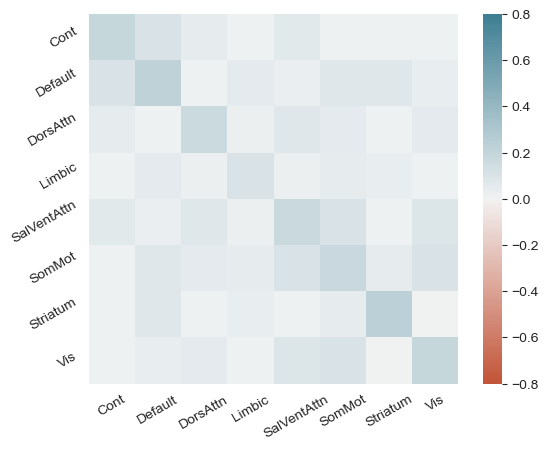

In [102]:
mat, labels = c7, t7net.columns.tolist()

ax = seaborn.heatmap(mat, square=True,
    vmin=-.8, vmax=.8, center=0,
    cmap=seaborn.diverging_palette(20, 220, n=200))
ax.set_xticklabels(labels, rotation=30)
ax.set_yticklabels(labels, rotation=30)
plt.show()

In [ ]:
# to plot reordered

In [101]:
from scipy.cluster.hierarchy import linkage, optimal_leaf_ordering, leaves_list

def reorder(mat, labels):
    linkage_matrix = linkage(mat, method='average')
    ordered_linkage = optimal_leaf_ordering(linkage_matrix, mat)
    index = leaves_list(ordered_linkage)
    # make sure labels is an ndarray and copy it
    labels = np.array(labels).copy()
    mat = mat.copy()
    # and reorder labels and matrix
    labels = labels[index].tolist()
    mat = mat[index, :][:, index]
    return mat, labels

In [210]:
def plot_cmat(mat, labels=None, reordered=True):
    if labels is None:
        if isinstance(mat, pd.DataFrame):
            mat, labels = mat.to_numpy(), mat.index.tolist()
        else:   raise Exception('mat.index should be labels')

    if reordered: mat, labels = reorder(mat, labels)
    ax = seaborn.heatmap(mat, square=True,
        vmin=-.8, vmax=.8, center=0,
        cmap=seaborn.diverging_palette(20, 220, n=200))
    ax.set_xticklabels(labels, rotation=30)
    ax.set_yticklabels(labels, rotation=30)
    plt.show()

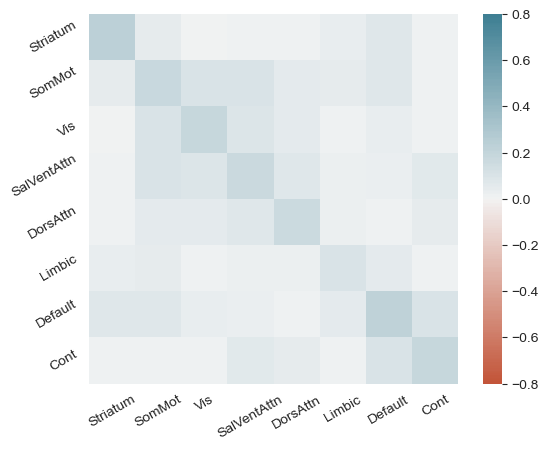

In [205]:
plot_cmat(c7, t7net.columns.tolist())

In [104]:
# compute for all subjects

In [129]:
from scipy.stats import pearsonr

In [130]:
from tqdm import tqdm
tqdm.pandas()

In [131]:
t = ts_network(2, 'baseline')
t.columns.tolist()

['Cont',
 'Default',
 'DorsAttn',
 'Limbic',
 'SalVentAttn',
 'SomMot',
 'Striatum',
 'Vis']

In [132]:
seeds = t.columns.tolist()

In [137]:
list0 = []
for seed in tqdm(seeds):
    list1 = []
    for e in EPOCHS:
        list2 = []
        for subj in S:
            ts = ts_network(subj, e)    # changed to network level average
            seed_ts = ts[seed]
            # we neglect pvalue of whether r is significant
            r = [pearsonr(seed_ts, ts[idx])[0] for idx in ts]  # pearsonr()[0] is rvalue
            r = pd.DataFrame({'r': r}, index=ts.columns)
            r.rename_axis('net', inplace=True)
            r = pd.concat([r], keys=[subj], names=['subject'])
            list2.append(r)
        r = pd.concat(list2, 0)
        r = pd.concat([r], keys=[e], names=['epoch'])  # adds epoch as lower level index
        list1.append(r)

    dfr = pd.concat(list1, 0)
    dfr = pd.concat([dfr], keys=[seed], names=['seed_net'])
    list0.append(dfr)

dfr = pd.concat(list0, 0)
dfr

100%|██████████| 8/8 [00:36<00:00,  4.62s/it]


r
seed_net epoch    subject net                  
Cont     baseline 1       Cont         1.000000
                          Default      0.503379
                          DorsAttn     0.266741
                          Limbic       0.084076
                          SalVentAttn  0.378365
...                                         ...
Vis      late     46      Limbic       0.405171
                          SalVentAttn  0.397490
                          SomMot       0.469229
                          Striatum     0.143832
                          Vis          1.000000

[6912 rows x 1 columns]

In [141]:
dfr

r
seed_net epoch    subject net                  
Cont     baseline 1       Cont         1.000000
                          Default      0.503379
                          DorsAttn     0.266741
                          Limbic       0.084076
                          SalVentAttn  0.378365
...                                         ...
Vis      late     46      Limbic       0.405171
                          SalVentAttn  0.397490
                          SomMot       0.469229
                          Striatum     0.143832
                          Vis          1.000000

[6912 rows x 1 columns]

In [ ]:
# average

In [143]:
dfr_mean = dfr.groupby(level=[0, 1, 3]).mean()
dfr_mean

r
seed_net epoch    net                  
Cont     baseline Cont         1.000000
                  Default      0.296385
                  DorsAttn     0.496772
                  Limbic       0.184834
                  SalVentAttn  0.334573
...                                 ...
Vis      late     Limbic       0.238880
                  SalVentAttn  0.154958
                  SomMot       0.326047
                  Striatum     0.161634
                  Vis          1.000000

[192 rows x 1 columns]

In [ ]:
# plot mean on baseline epoch

In [151]:
mean_baseline = dfr_mean.xs('baseline', level=1)
mean_baseline = mean_baseline.unstack(1)
mean_baseline

r                                                      \
net              Cont   Default  DorsAttn    Limbic SalVentAttn    SomMot   
seed_net                                                                    
Cont         1.000000  0.296385  0.496772  0.184834    0.334573  0.138832   
Default      0.296385  1.000000 -0.005508  0.561466    0.001175  0.229315   
DorsAttn     0.496772 -0.005508  1.000000  0.132946    0.538136  0.456351   
Limbic       0.184834  0.561466  0.132946  1.000000    0.151434  0.300537   
SalVentAttn  0.334573  0.001175  0.538136  0.151434    1.000000  0.670327   
SomMot       0.138832  0.229315  0.456351  0.300537    0.670327  1.000000   
Striatum     0.106352  0.188808  0.104040  0.247481    0.214382  0.225914   
Vis          0.116996  0.326795  0.354706  0.262180    0.195208  0.386138   

                                 
net          Striatum       Vis  
seed_net                         
Cont         0.106352  0.116996  
Default      0.188808  0.326795  
DorsAttn     0.104040  0.354706  
Limbic       0.247481  0.262180  
SalVentAttn  0.214382  0.195208  
SomMot       0.225914  0.386138  
Striatum     1.000000  0.127197  
Vis          0.127197  1.000000

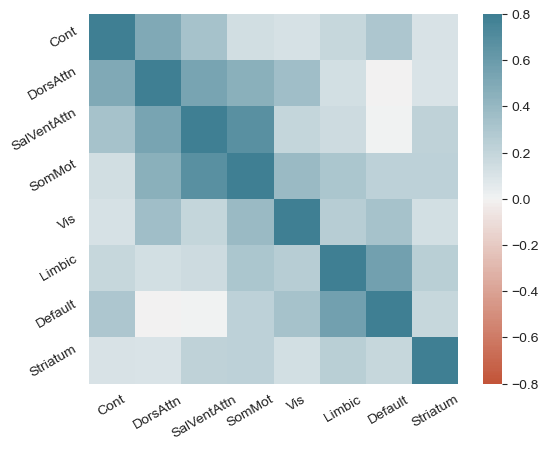

In [164]:
plot_cmat(mean_baseline.to_numpy(), mean_baseline.index.tolist())

In [165]:
# shift between epochs, like baseline2early

In [ ]:
import pingouin as pg

In [200]:
dfp = dfr.reset_index([1, 2]).groupby(level=[0, 1]).progress_apply(pg.pairwise_tests, dv='r', between='epoch',
                                                                   subject='subject', padjust='fdr_bh')
dfp.reset_index(level=2, inplace=True)
dfp = dfp.set_index([dfp.index, 'A', 'B']).reorder_levels([0, 2, 3, 1])
dfp = dfp[['T', 'p-unc', 'p-corr']]
dfp = dfp.reorder_levels([1,2,0,3])

100%|██████████| 64/64 [00:00<00:00, 77.78it/s]


In [215]:
dfp.loc['baseline', 'early'].unstack(1)['T']

net,Cont,Default,DorsAttn,Limbic,SalVentAttn,SomMot,Striatum,Vis
seed_net,,,,,,,,
Cont,0.000000,0.002299,-0.290784,-0.018000,0.134195,0.047620,-0.145286,-0.225880
Default,0.002299,0.000000,0.284215,0.352368,-0.381598,0.065111,-0.044434,0.075342
DorsAttn,-0.290784,0.284215,0.000000,0.360461,-0.286464,0.273929,-0.012098,0.110757
Limbic,-0.018000,0.352368,0.360461,0.000000,-0.021773,0.504926,0.216188,0.198361
SalVentAttn,0.134195,-0.381598,-0.286464,-0.021773,0.000000,-0.316161,0.000626,-0.261140
SomMot,0.047620,0.065111,0.273929,0.504926,-0.316161,0.000000,0.202652,0.168916
Striatum,-0.145286,-0.044434,-0.012098,0.216188,0.000626,0.202652,0.000000,-0.034930
Vis,-0.225880,0.075342,0.110757,0.198361,-0.261140,0.168916,-0.034930,0.000000


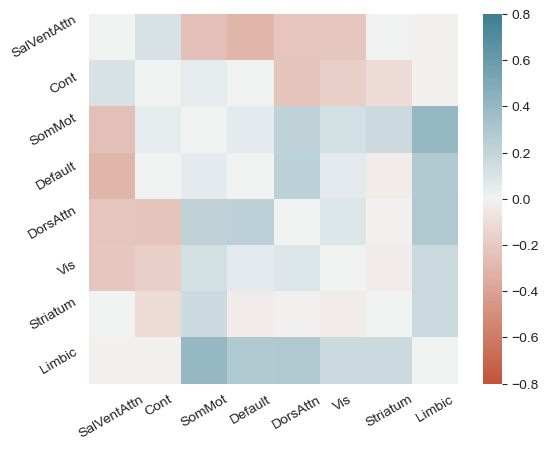

In [217]:
plot_cmat(dfp.loc['baseline', 'early'].unstack(1)['T']/5)

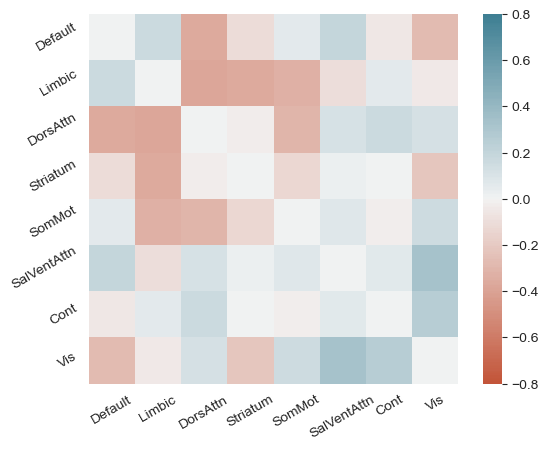

In [282]:
plot_cmat(dfp.loc['early', 'late'].unstack(1)['T']/5)

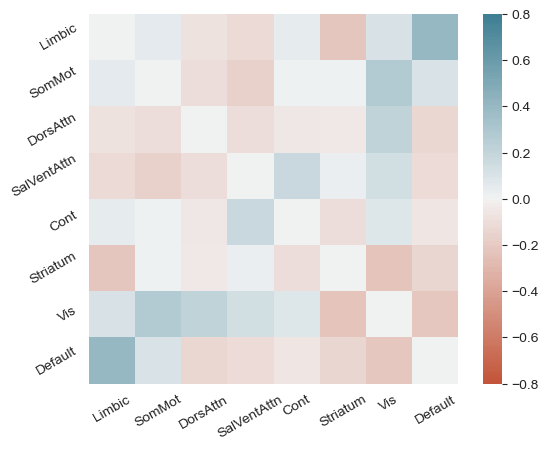

In [284]:
plot_cmat(dfp.loc['baseline', 'late'].unstack(1)['T']/5)

In [224]:
df = dfr.unstack(1)

In [234]:
df = df['r']

In [239]:
df['b2e'] = df['early'] - df['baseline']
df['e2l'] = df['late'] - df['early']

In [248]:
df

epoch                         baseline     early      late           b2e  \
seed_net subject net                                                       
Cont     1       Cont         1.000000  1.000000  1.000000  2.220446e-16   
                 Default      0.503379  0.366787  0.489746 -1.365916e-01   
                 DorsAttn     0.266741  0.523383  0.532710  2.566415e-01   
                 Limbic       0.084076  0.111515  0.123756  2.743891e-02   
                 SalVentAttn  0.378365  0.279137  0.227137 -9.922761e-02   
...                                ...       ...       ...           ...   
Vis      46      Limbic       0.193395  0.222742  0.405171  2.934726e-02   
                 SalVentAttn  0.082745  0.472687  0.397490  3.899417e-01   
                 SomMot       0.130062  0.547790  0.469229  4.177283e-01   
                 Striatum     0.015032  0.301481  0.143832  2.864485e-01   
                 Vis          1.000000  1.000000  1.000000  2.220446e-16   

epoch                              e2l  
seed_net subject net                    
Cont     1       Cont         0.000000  
                 Default      0.122959  
                 DorsAttn     0.009328  
                 Limbic       0.012241  
                 SalVentAttn -0.052000  
...                                ...  
Vis      46      Limbic       0.182429  
                 SalVentAttn -0.075196  
                 SomMot      -0.078561  
                 Striatum    -0.157649  
                 Vis          0.000000  

[2304 rows x 5 columns]

In [241]:
# load behavioral data

In [251]:
metrics = pd.read_csv('data/metrics.csv').set_index('subject').drop(columns=['Subject'])
metrics

,tscore,RLScore
subject,,
1,-7.195868,-1.179789
2,-5.822339,1.104018
3,-2.248812,-0.302101
4,-6.593196,-1.400917
6,-15.539946,0.868475
7,-4.009663,0.859943
8,-6.426085,1.433999
9,-11.893333,-0.661215
10,-3.318209,-0.337563


In [253]:
df = df.join(metrics)

In [254]:
df

baseline     early      late           b2e  \
seed_net subject net                                                       
Cont     1       Cont         1.000000  1.000000  1.000000  2.220446e-16   
                 Default      0.503379  0.366787  0.489746 -1.365916e-01   
                 DorsAttn     0.266741  0.523383  0.532710  2.566415e-01   
                 Limbic       0.084076  0.111515  0.123756  2.743891e-02   
                 SalVentAttn  0.378365  0.279137  0.227137 -9.922761e-02   
...                                ...       ...       ...           ...   
Vis      46      Limbic       0.193395  0.222742  0.405171  2.934726e-02   
                 SalVentAttn  0.082745  0.472687  0.397490  3.899417e-01   
                 SomMot       0.130062  0.547790  0.469229  4.177283e-01   
                 Striatum     0.015032  0.301481  0.143832  2.864485e-01   
                 Vis          1.000000  1.000000  1.000000  2.220446e-16   

                                   e2l    tscore   RLScore  
seed_net subject net                                        
Cont     1       Cont         0.000000 -7.195868 -1.179789  
                 Default      0.122959 -7.195868 -1.179789  
                 DorsAttn     0.009328 -7.195868 -1.179789  
                 Limbic       0.012241 -7.195868 -1.179789  
                 SalVentAttn -0.052000 -7.195868 -1.179789  
...                                ...       ...       ...  
Vis      46      Limbic       0.182429 -1.138829 -0.116459  
                 SalVentAttn -0.075196 -1.138829 -0.116459  
                 SomMot      -0.078561 -1.138829 -0.116459  
                 Striatum    -0.157649 -1.138829 -0.116459  
                 Vis          0.000000 -1.138829 -0.116459  

[2304 rows x 7 columns]

In [255]:
from scipy.stats import pearsonr

In [256]:
def r_value(data, x, y):   return pearsonr(data[x], data[y])[0]
def p_value(data, x, y):   return pearsonr(data[x], data[y])[1]

In [262]:
df = df.reset_index(level=1)

In [263]:
df

subject  baseline     early      late           b2e  \
seed_net net                                                                
Cont     Cont               1  1.000000  1.000000  1.000000  2.220446e-16   
         Default            1  0.503379  0.366787  0.489746 -1.365916e-01   
         DorsAttn           1  0.266741  0.523383  0.532710  2.566415e-01   
         Limbic             1  0.084076  0.111515  0.123756  2.743891e-02   
         SalVentAttn        1  0.378365  0.279137  0.227137 -9.922761e-02   
...                       ...       ...       ...       ...           ...   
Vis      Limbic            46  0.193395  0.222742  0.405171  2.934726e-02   
         SalVentAttn       46  0.082745  0.472687  0.397490  3.899417e-01   
         SomMot            46  0.130062  0.547790  0.469229  4.177283e-01   
         Striatum          46  0.015032  0.301481  0.143832  2.864485e-01   
         Vis               46  1.000000  1.000000  1.000000  2.220446e-16   

                           e2l    tscore   RLScore  
seed_net net                                        
Cont     Cont         0.000000 -7.195868 -1.179789  
         Default      0.122959 -7.195868 -1.179789  
         DorsAttn     0.009328 -7.195868 -1.179789  
         Limbic       0.012241 -7.195868 -1.179789  
         SalVentAttn -0.052000 -7.195868 -1.179789  
...                        ...       ...       ...  
Vis      Limbic       0.182429 -1.138829 -0.116459  
         SalVentAttn -0.075196 -1.138829 -0.116459  
         SomMot      -0.078561 -1.138829 -0.116459  
         Striatum    -0.157649 -1.138829 -0.116459  
         Vis          0.000000 -1.138829 -0.116459  

[2304 rows x 8 columns]

<AxesSubplot: xlabel='b2e', ylabel='RLScore'>

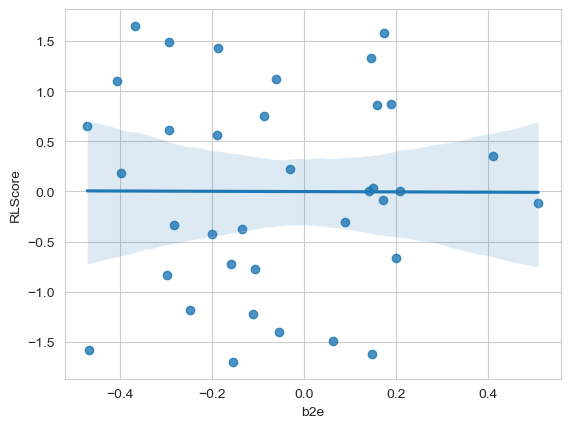

In [287]:
seaborn.regplot(data=df.loc['Default', 'DorsAttn'], x='b2e', y='RLScore')

In [280]:
# baseline2early Connectivity shift

In [296]:
df.round(3)

subject  baseline  early   late    b2e    e2l  tscore  \
seed_net net                                                                  
Cont     Cont               1     1.000  1.000  1.000  0.000  0.000  -7.196   
         Default            1     0.503  0.367  0.490 -0.137  0.123  -7.196   
         DorsAttn           1     0.267  0.523  0.533  0.257  0.009  -7.196   
         Limbic             1     0.084  0.112  0.124  0.027  0.012  -7.196   
         SalVentAttn        1     0.378  0.279  0.227 -0.099 -0.052  -7.196   
...                       ...       ...    ...    ...    ...    ...     ...   
Vis      Limbic            46     0.193  0.223  0.405  0.029  0.182  -1.139   
         SalVentAttn       46     0.083  0.473  0.397  0.390 -0.075  -1.139   
         SomMot            46     0.130  0.548  0.469  0.418 -0.079  -1.139   
         Striatum          46     0.015  0.301  0.144  0.286 -0.158  -1.139   
         Vis               46     1.000  1.000  1.000  0.000  0.000  -1.139   

                      RLScore  
seed_net net                   
Cont     Cont          -1.180  
         Default       -1.180  
         DorsAttn      -1.180  
         Limbic        -1.180  
         SalVentAttn   -1.180  
...                       ...  
Vis      Limbic        -0.116  
         SalVentAttn   -0.116  
         SomMot        -0.116  
         Striatum      -0.116  
         Vis           -0.116  

[2304 rows x 8 columns]

In [302]:
p = df.round(3).groupby(level=[0,1]).apply(p_value, x='b2e', y='RLScore')
(p<.05).sum()

2

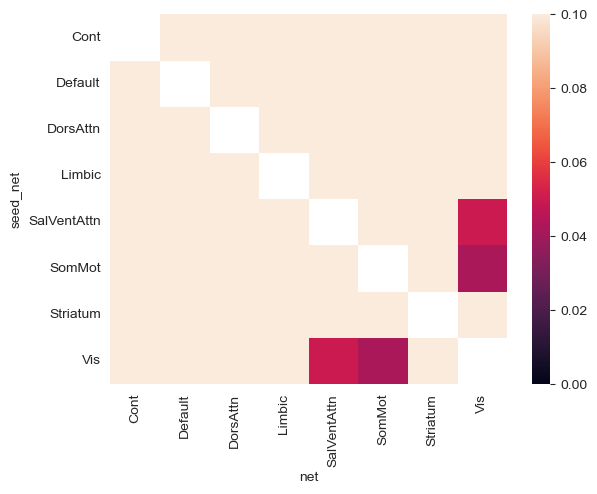

In [307]:
ax = seaborn.heatmap(p.unstack(1), vmin=0, vmax=.1)
fig = ax.get_figure()
# fig.savefig("plots/b2e-shift-vs-behavior-7net.png")

<AxesSubplot: xlabel='net', ylabel='seed_net'>

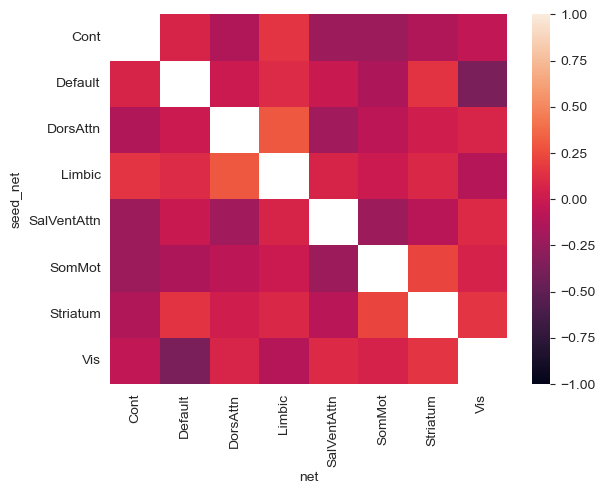

In [306]:
r = df.round(3).groupby(level=[0,1]).apply(r_value, x='b2e', y='RLScore')
seaborn.heatmap(r.unstack(1), vmin=-1, vmax=1)

In [279]:
# early 2 late Connectivity shift

In [308]:
p = df.round(3).groupby(level=[0,1]).apply(p_value, x='e2l', y='RLScore')
(p<.05).sum()

4

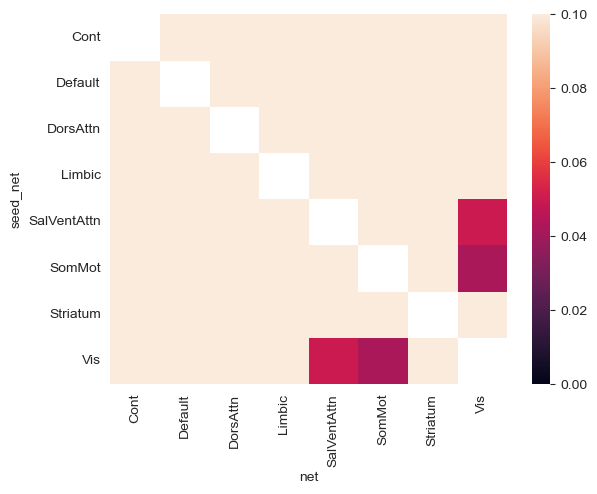

In [309]:
ax = seaborn.heatmap(p.unstack(1), vmin=0, vmax=.1, square=True)
fig = ax.get_figure()
# fig.savefig("plots/e2l-shift-vs-behavior-7net.png")

# 17 networks

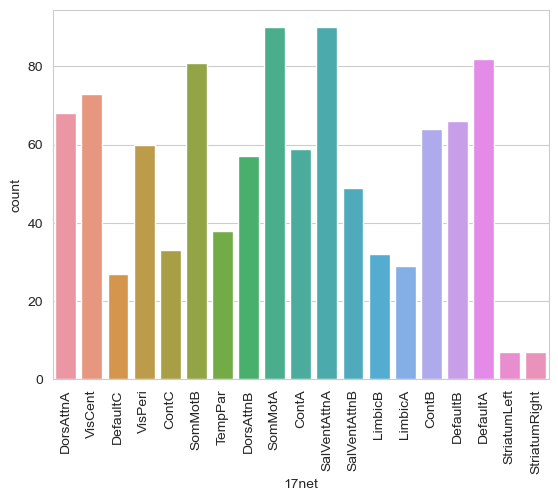

In [317]:
import seaborn

ax = seaborn.countplot(x='17net', data=regions_networks)
ax.tick_params(axis='x', rotation=90)

In [16]:
# merge region with networks

In [314]:
def ts_network(subject, epoch):
    ts = timeseries(subject, epoch)
    ts = ts.transpose().join(regions_networks)
    ts = ts.set_index(['7net', '17net'], append=True).reorder_levels([1, 2, 0])
    ts = ts.groupby(level=1).mean().transpose()   # level 0 for 7 net - 1 for 17 net
    return ts

In [318]:
ts_network(2, 'baseline')

17net,ContA,ContB,ContC,DefaultA,DefaultB,DefaultC,DorsAttnA,DorsAttnB,LimbicA,LimbicB,SalVentAttnA,SalVentAttnB,SomMotA,SomMotB,StriatumLeft,StriatumRight,TempPar,VisCent,VisPeri
0,-0.271466,-0.225247,0.512717,0.134107,-0.325829,-0.265444,0.298597,-0.393778,0.188204,0.081478,-0.366279,0.032374,-0.737209,-0.681659,-0.804624,-0.186852,0.102076,0.301120,0.251590
1,-0.214743,-0.121366,0.404051,0.201975,-0.142574,0.456497,0.337778,-0.290238,0.461568,-0.025321,-0.528412,-0.260402,-0.765987,-0.267829,-0.928334,-1.123614,0.382730,0.221688,0.657475
2,0.125442,0.302262,0.189635,-0.047995,0.247620,0.519983,0.216033,0.122925,0.465943,-0.162170,-0.205494,0.080139,-0.091006,0.143214,0.875735,-0.250954,0.310457,0.064902,0.671094
3,0.480974,0.657125,-0.032846,-0.484319,0.325700,-0.067671,0.105216,0.511967,0.159756,-0.216873,0.203797,0.620952,0.573956,0.018393,1.167302,1.305232,-0.101963,-0.062350,0.178439
4,0.511548,0.527805,-0.214900,-0.707655,-0.070318,-0.611352,0.090991,0.477675,-0.254821,-0.206059,0.264190,0.649294,0.562045,-0.524451,0.111903,0.111105,-0.495594,-0.212461,-0.521704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.654577,0.657621,-0.119345,0.007667,-0.437305,0.616555,0.459310,0.125654,0.497193,0.064568,0.127831,0.260672,0.300911,-0.076421,0.295681,-0.032776,0.019946,0.584212,0.533457
212,0.187961,0.207320,-0.250312,0.235595,-0.550200,0.344738,-0.107710,-0.638652,0.342569,0.306282,-0.097307,0.091021,0.154837,0.109885,-0.030912,-0.118323,-0.215093,0.254545,0.400144
213,-0.512846,-0.448014,-0.334306,0.301363,-0.390245,-0.112368,-0.508513,-1.016216,0.006240,0.476451,-0.224817,-0.112540,-0.067479,0.178655,1.078868,0.590589,-0.246684,-0.120170,0.130180
214,-0.592293,-0.394353,-0.070654,0.148804,-0.024133,-0.109714,-0.299521,-0.571552,0.089995,0.471178,-0.188934,-0.060762,-0.429067,-0.353389,0.894148,0.400249,-0.195490,-0.179817,0.151331


In [319]:
import numpy as np
from nilearn.connectome import ConnectivityMeasure


def cmat(ts: pd.DataFrame, fill_diag=False, kind='covariance') -> np.ndarray:
    conn_measure = ConnectivityMeasure(kind=kind)
    cmat = conn_measure.fit_transform([ts.to_numpy()])[0]
    if fill_diag:   np.fill_diagonal(cmat, 0)
    return cmat

In [ ]:
from matplotlib import pyplot as plt

In [320]:
# to plot reordered

In [321]:
from scipy.cluster.hierarchy import linkage, optimal_leaf_ordering, leaves_list

def reorder(mat, labels):
    linkage_matrix = linkage(mat, method='average')
    ordered_linkage = optimal_leaf_ordering(linkage_matrix, mat)
    index = leaves_list(ordered_linkage)
    # make sure labels is an ndarray and copy it
    labels = np.array(labels).copy()
    mat = mat.copy()
    # and reorder labels and matrix
    labels = labels[index].tolist()
    mat = mat[index, :][:, index]
    return mat, labels

In [392]:
def plot_cmat(mat, labels=None, reordered=True):
    if labels is None:
        if isinstance(mat, pd.DataFrame):
            mat, labels = mat.to_numpy(), mat.index.tolist()
        else:   raise Exception('mat.index should be labels')

    if reordered: mat, labels = reorder(mat, labels)
    ax = seaborn.heatmap(mat, square=True,
        vmin=-.8, vmax=.8, center=0,
        cmap=seaborn.diverging_palette(20, 220, n=200),
                         xticklabels=labels, yticklabels=labels)
    plt.show()

In [104]:
# compute for all subjects

In [129]:
from scipy.stats import pearsonr

In [130]:
from tqdm import tqdm
tqdm.pandas()

In [324]:
t = ts_network(2, 'baseline')
t.columns.tolist()

['ContA',
 'ContB',
 'ContC',
 'DefaultA',
 'DefaultB',
 'DefaultC',
 'DorsAttnA',
 'DorsAttnB',
 'LimbicA',
 'LimbicB',
 'SalVentAttnA',
 'SalVentAttnB',
 'SomMotA',
 'SomMotB',
 'StriatumLeft',
 'StriatumRight',
 'TempPar',
 'VisCent',
 'VisPeri']

In [325]:
seeds = t.columns.tolist()

In [ ]:
list0 = []
for seed in tqdm(seeds):
    list1 = []
    for e in EPOCHS:
        list2 = []
        for subj in S:
            ts = ts_network(subj, e)    # changed to network level average
            seed_ts = ts[seed]
            # we neglect pvalue of whether r is significant
            r = [pearsonr(seed_ts, ts[idx])[0] for idx in ts]  # pearsonr()[0] is rvalue
            r = pd.DataFrame({'r': r}, index=ts.columns)
            r.rename_axis('net', inplace=True)
            r = pd.concat([r], keys=[subj], names=['subject'])
            list2.append(r)
        r = pd.concat(list2, 0)
        r = pd.concat([r], keys=[e], names=['epoch'])  # adds epoch as lower level index
        list1.append(r)

    dfr = pd.concat(list1, 0)
    dfr = pd.concat([dfr], keys=[seed], names=['seed_net'])
    list0.append(dfr)

dfr = pd.concat(list0, 0)

In [344]:
dfr

r
seed_net epoch    subject net                    
ContA    baseline 1       ContA          1.000000
                          ContB          0.438076
                          ContC          0.238990
                          DefaultA       0.015879
                          DefaultB       0.011069
...                                           ...
VisPeri  late     46      StriatumLeft   0.224803
                          StriatumRight  0.105720
                          TempPar        0.700859
                          VisCent        0.843383
                          VisPeri        1.000000

[38988 rows x 1 columns]

In [331]:
# average

In [332]:
dfr_mean = dfr.groupby(level=[0, 1, 3]).mean()
dfr_mean

r
seed_net epoch    net                    
ContA    baseline ContA          1.000000
                  ContB          0.589165
                  ContC          0.223974
                  DefaultA      -0.048825
                  DefaultB       0.115700
...                                   ...
VisPeri  late     StriatumLeft   0.149611
                  StriatumRight  0.137402
                  TempPar        0.264761
                  VisCent        0.667116
                  VisPeri        1.000000

[1083 rows x 1 columns]

In [333]:
# plot mean on baseline epoch

In [334]:
mean_baseline = dfr_mean.xs('baseline', level=1)
mean_baseline = mean_baseline.unstack(1)
mean_baseline

r                                                    \
net               ContA     ContB     ContC  DefaultA  DefaultB  DefaultC   
seed_net                                                                    
ContA          1.000000  0.589165  0.223974 -0.048825  0.115700  0.134502   
ContB          0.589165  1.000000  0.329723  0.352360  0.460168  0.060231   
ContC          0.223974  0.329723  1.000000  0.569590  0.116297  0.431168   
DefaultA      -0.048825  0.352360  0.569590  1.000000  0.569179  0.520177   
DefaultB       0.115700  0.460168  0.116297  0.569179  1.000000  0.165777   
DefaultC       0.134502  0.060231  0.431168  0.520177  0.165777  1.000000   
DorsAttnA      0.572559  0.204711  0.296850  0.016795  0.030400  0.397725   
DorsAttnB      0.530068  0.111884  0.107604 -0.140321 -0.034479  0.160685   
LimbicA        0.164571  0.186049  0.097789  0.226146  0.411916  0.271903   
LimbicB        0.064499  0.239280  0.239056  0.592024  0.446795  0.343721   
SalVentAttnA   0.285115 -0.033056  0.197543 -0.086047  0.012376  0.162804   
SalVentAttnB   0.460901  0.338459  0.196553 -0.114906  0.141990 -0.095623   
SomMotA        0.164786 -0.000452  0.140849  0.089823  0.114273  0.270397   
SomMotB        0.160584  0.054487  0.159664  0.198228  0.219439  0.308221   
StriatumLeft   0.080283  0.058511  0.075098  0.163920  0.172024  0.177408   
StriatumRight  0.097007  0.075512  0.085270  0.132628  0.117287  0.169570   
TempPar        0.216401  0.224405  0.229283  0.348305  0.570940  0.299603   
VisCent        0.115095  0.154093  0.191599  0.271150  0.228556  0.388553   
VisPeri        0.037975  0.039879  0.314888  0.283062  0.115976  0.568684   

                                                                    \
net           DorsAttnA DorsAttnB   LimbicA   LimbicB SalVentAttnA   
seed_net                                                             
ContA          0.572559  0.530068  0.164571  0.064499     0.285115   
ContB          0.204711  0.111884  0.186049  0.239280    -0.033056   
ContC          0.296850  0.107604  0.097789  0.239056     0.197543   
DefaultA       0.016795 -0.140321  0.226146  0.592024    -0.086047   
DefaultB       0.030400 -0.034479  0.411916  0.446795     0.012376   
DefaultC       0.397725  0.160685  0.271903  0.343721     0.162804   
DorsAttnA      1.000000  0.665993  0.171859  0.065782     0.368201   
DorsAttnB      0.665993  1.000000  0.133245 -0.018650     0.657795   
LimbicA        0.171859  0.133245  1.000000  0.352613     0.217113   
LimbicB        0.065782 -0.018650  0.352613  1.000000     0.017700   
SalVentAttnA   0.368201  0.657795  0.217113  0.017700     1.000000   
SalVentAttnB   0.242231  0.392257  0.095168  0.004863     0.606101   
SomMotA        0.406368  0.633190  0.200234  0.129887     0.636134   
SomMotB        0.231995  0.367025  0.313424  0.211232     0.636964   
StriatumLeft   0.067997  0.100783  0.217813  0.187359     0.193861   
StriatumRight  0.099795  0.115963  0.213035  0.155608     0.204527   
TempPar        0.290620  0.203013  0.359502  0.277570     0.364770   
VisCent        0.524398  0.237575  0.153555  0.250709     0.127915   
VisPeri        0.338531  0.114779  0.129629  0.193419     0.212392   

                                                                           \
net           SalVentAttnB   SomMotA   SomMotB StriatumLeft StriatumRight   
seed_net                                                                    
ContA             0.460901  0.164786  0.160584     0.080283      0.097007   
ContB             0.338459 -0.000452  0.054487     0.058511      0.075512   
ContC             0.196553  0.140849  0.159664     0.075098      0.085270   
DefaultA         -0.114906  0.089823  0.198228     0.163920      0.132628   
DefaultB          0.141990  0.114273  0.219439     0.172024      0.117287   
DefaultC         -0.095623  0.270397  0.308221     0.177408      0.169570   
DorsAttnA         0.242231  0.406368  0.231995     0.067997      0.099795   
DorsAttnB       

In [335]:
mean_baseline

r                                                    \
net               ContA     ContB     ContC  DefaultA  DefaultB  DefaultC   
seed_net                                                                    
ContA          1.000000  0.589165  0.223974 -0.048825  0.115700  0.134502   
ContB          0.589165  1.000000  0.329723  0.352360  0.460168  0.060231   
ContC          0.223974  0.329723  1.000000  0.569590  0.116297  0.431168   
DefaultA      -0.048825  0.352360  0.569590  1.000000  0.569179  0.520177   
DefaultB       0.115700  0.460168  0.116297  0.569179  1.000000  0.165777   
DefaultC       0.134502  0.060231  0.431168  0.520177  0.165777  1.000000   
DorsAttnA      0.572559  0.204711  0.296850  0.016795  0.030400  0.397725   
DorsAttnB      0.530068  0.111884  0.107604 -0.140321 -0.034479  0.160685   
LimbicA        0.164571  0.186049  0.097789  0.226146  0.411916  0.271903   
LimbicB        0.064499  0.239280  0.239056  0.592024  0.446795  0.343721   
SalVentAttnA   0.285115 -0.033056  0.197543 -0.086047  0.012376  0.162804   
SalVentAttnB   0.460901  0.338459  0.196553 -0.114906  0.141990 -0.095623   
SomMotA        0.164786 -0.000452  0.140849  0.089823  0.114273  0.270397   
SomMotB        0.160584  0.054487  0.159664  0.198228  0.219439  0.308221   
StriatumLeft   0.080283  0.058511  0.075098  0.163920  0.172024  0.177408   
StriatumRight  0.097007  0.075512  0.085270  0.132628  0.117287  0.169570   
TempPar        0.216401  0.224405  0.229283  0.348305  0.570940  0.299603   
VisCent        0.115095  0.154093  0.191599  0.271150  0.228556  0.388553   
VisPeri        0.037975  0.039879  0.314888  0.283062  0.115976  0.568684   

                                                                    \
net           DorsAttnA DorsAttnB   LimbicA   LimbicB SalVentAttnA   
seed_net                                                             
ContA          0.572559  0.530068  0.164571  0.064499     0.285115   
ContB          0.204711  0.111884  0.186049  0.239280    -0.033056   
ContC          0.296850  0.107604  0.097789  0.239056     0.197543   
DefaultA       0.016795 -0.140321  0.226146  0.592024    -0.086047   
DefaultB       0.030400 -0.034479  0.411916  0.446795     0.012376   
DefaultC       0.397725  0.160685  0.271903  0.343721     0.162804   
DorsAttnA      1.000000  0.665993  0.171859  0.065782     0.368201   
DorsAttnB      0.665993  1.000000  0.133245 -0.018650     0.657795   
LimbicA        0.171859  0.133245  1.000000  0.352613     0.217113   
LimbicB        0.065782 -0.018650  0.352613  1.000000     0.017700   
SalVentAttnA   0.368201  0.657795  0.217113  0.017700     1.000000   
SalVentAttnB   0.242231  0.392257  0.095168  0.004863     0.606101   
SomMotA        0.406368  0.633190  0.200234  0.129887     0.636134   
SomMotB        0.231995  0.367025  0.313424  0.211232     0.636964   
StriatumLeft   0.067997  0.100783  0.217813  0.187359     0.193861   
StriatumRight  0.099795  0.115963  0.213035  0.155608     0.204527   
TempPar        0.290620  0.203013  0.359502  0.277570     0.364770   
VisCent        0.524398  0.237575  0.153555  0.250709     0.127915   
VisPeri        0.338531  0.114779  0.129629  0.193419     0.212392   

                                                                           \
net           SalVentAttnB   SomMotA   SomMotB StriatumLeft StriatumRight   
seed_net                                                                    
ContA             0.460901  0.164786  0.160584     0.080283      0.097007   
ContB             0.338459 -0.000452  0.054487     0.058511      0.075512   
ContC             0.196553  0.140849  0.159664     0.075098      0.085270   
DefaultA         -0.114906  0.089823  0.198228     0.163920      0.132628   
DefaultB          0.141990  0.114273  0.219439     0.172024      0.117287   
DefaultC         -0.095623  0.270397  0.308221     0.177408      0.169570   
DorsAttnA         0.242231  0.406368  0.231995     0.067997      0.099795   
DorsAttnB       

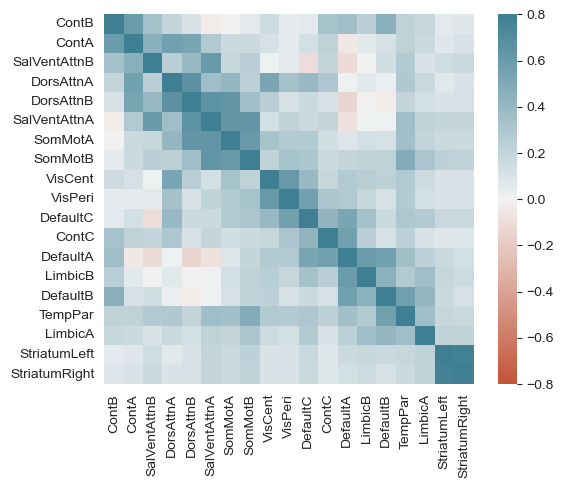

In [393]:
plot_cmat(mean_baseline)

In [165]:
# shift between epochs, like baseline2early

In [337]:
import pingouin as pg

In [338]:
dfp = dfr.reset_index([1, 2]).groupby(level=[0, 1]).progress_apply(pg.pairwise_tests, dv='r', between='epoch',
                                                                   subject='subject', padjust='fdr_bh')
dfp.reset_index(level=2, inplace=True)
dfp = dfp.set_index([dfp.index, 'A', 'B']).reorder_levels([0, 2, 3, 1])
dfp = dfp[['T', 'p-unc', 'p-corr']]
dfp = dfp.reorder_levels([1,2,0,3])

100%|██████████| 361/361 [00:04<00:00, 78.25it/s]


In [339]:
dfp.loc['baseline', 'early'].unstack(1)['T']

net,ContA,ContB,ContC,DefaultA,DefaultB,DefaultC,DorsAttnA,DorsAttnB,LimbicA,LimbicB,SalVentAttnA,SalVentAttnB,SomMotA,SomMotB,StriatumLeft,StriatumRight,TempPar,VisCent,VisPeri
seed_net,,,,,,,,,,,,,,,,,,,
ContA,0.000000,-1.359008,-1.380231,-0.148984,2.362985,-0.919717,-1.836304,-0.133037,1.658769,0.294528,0.365068,-1.544007,0.509600,1.131226,-0.507214,-0.647510,2.281959,-0.998565,-0.369937
ContB,-1.359008,0.000000,-0.706209,-0.154054,0.476410,0.390585,-1.069228,-0.106532,1.491603,-1.069086,0.298487,-1.697434,0.259233,1.008131,-0.142056,-0.181642,0.515921,0.065657,0.536232
ContC,-1.380231,-0.706209,0.000000,-0.163570,-2.827148,-0.226139,-1.698902,-2.410186,-1.396037,-0.083859,-1.562637,-2.454784,-2.143160,-1.619218,-0.833256,-0.682225,-2.484603,-1.367213,-0.339350
DefaultA,-0.148984,-0.154054,-0.163570,0.000000,-5.052370,3.127950,0.502393,-0.144910,0.439648,1.471051,-2.294942,-4.224703,-1.069990,-0.319565,-0.111602,-0.195698,-4.692072,-0.364739,0.146435
DefaultB,2.362985,0.476410,-2.827148,-5.052370,0.000000,-0.420167,2.131820,2.730782,1.853647,-1.739963,0.531184,-0.532924,1.371471,1.142287,-0.284591,-0.622310,-1.901134,-0.062733,-0.432959
DefaultC,-0.919717,0.390585,-0.226139,3.127950,-0.420167,0.000000,-1.011681,-1.940423,-0.715067,2.714348,-3.627506,-5.045734,-0.247721,-0.668688,-0.838743,-0.168164,-1.964545,-0.559030,-0.917300
DorsAttnA,-1.836304,-1.069228,-1.698902,0.502393,2.131820,-1.011681,0.000000,-0.414080,1.474513,0.649850,-0.939607,-2.981973,1.118271,0.988372,-0.740949,-0.490218,1.272989,0.953203,0.580964
DorsAttnB,-0.133037,-0.106532,-2.410186,-0.144910,2.730782,-1.940423,-0.414080,0.000000,2.066023,0.346841,-1.075010,-2.120345,0.575093,0.799095,0.054469,1.047785,2.017420,1.307985,-0.393564
LimbicA,1.658769,1.491603,-1.396037,0.439648,1.853647,-0.715067,1.474513,2.066023,0.000000,0.067900,0.461196,-0.230214,1.973773,1.392978,0.883197,0.696127,1.130230,0.636058,0.111513


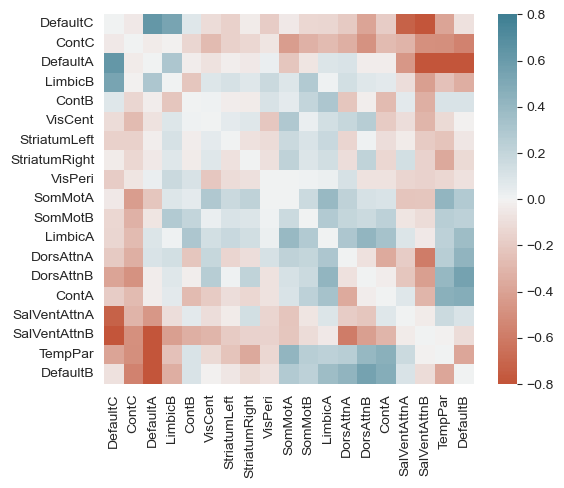

In [394]:
plot_cmat(dfp.loc['baseline', 'early'].unstack(1)['T']/5)

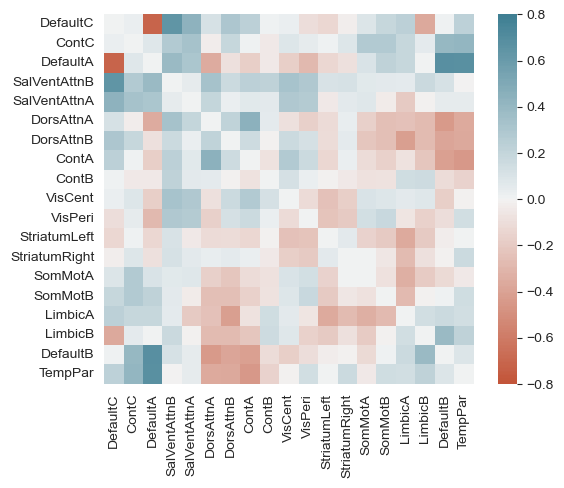

In [395]:
plot_cmat(dfp.loc['early', 'late'].unstack(1)['T']/5)

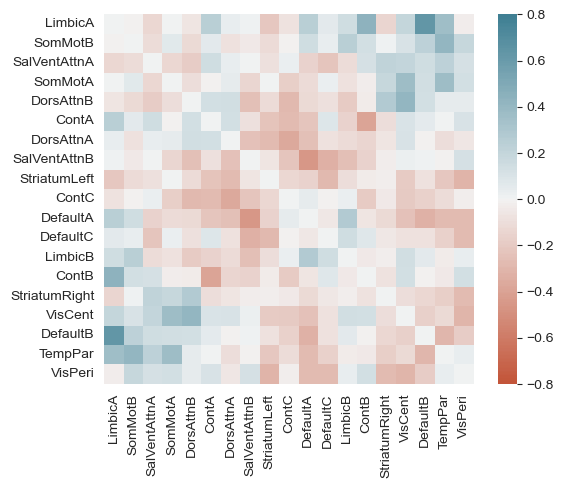

In [396]:
plot_cmat(dfp.loc['baseline', 'late'].unstack(1)['T']/5)

In [345]:
df = dfr.unstack(1)
df = df['r']
df['b2e'] = df['early'] - df['baseline']
df['e2l'] = df['late'] - df['early']

In [350]:
df

epoch                           baseline     early      late           b2e  \
seed_net subject net                                                         
ContA    1       ContA          1.000000  1.000000  1.000000  1.110223e-16   
                 ContB          0.438076  0.318047  0.655467 -1.200289e-01   
                 ContC          0.238990  0.072440  0.369207 -1.665500e-01   
                 DefaultA       0.015879 -0.148912  0.200918 -1.647905e-01   
                 DefaultB       0.011069 -0.160161  0.048673 -1.712298e-01   
...                                  ...       ...       ...           ...   
VisPeri  46      StriatumLeft  -0.014191  0.262218  0.224803  2.764092e-01   
                 StriatumRight  0.015245  0.285292  0.105720  2.700465e-01   
                 TempPar        0.310961  0.518559  0.700859  2.075977e-01   
                 VisCent        0.718451  0.777270  0.843383  5.881877e-02   
                 VisPeri        1.000000  1.000000  1.000000  0.000000e+00   

epoch                                e2l  
seed_net subject net                      
ContA    1       ContA          0.000000  
                 ContB          0.337420  
                 ContC          0.296768  
                 DefaultA       0.349830  
                 DefaultB       0.208834  
...                                  ...  
VisPeri  46      StriatumLeft  -0.037415  
                 StriatumRight -0.179572  
                 TempPar        0.182300  
                 VisCent        0.066113  
                 VisPeri        0.000000  

[12996 rows x 5 columns]

In [241]:
# load behavioral data

In [351]:
metrics = pd.read_csv('data/metrics.csv').set_index('subject').drop(columns=['Subject'])
metrics

,tscore,RLScore
subject,,
1,-7.195868,-1.179789
2,-5.822339,1.104018
3,-2.248812,-0.302101
4,-6.593196,-1.400917
6,-15.539946,0.868475
7,-4.009663,0.859943
8,-6.426085,1.433999
9,-11.893333,-0.661215
10,-3.318209,-0.337563


In [352]:
df = df.join(metrics)

In [355]:
df = df.reset_index(level=1)

In [353]:
from scipy.stats import pearsonr

In [354]:
def r_value(data, x, y):   return pearsonr(data[x], data[y])[0]
def p_value(data, x, y):   return pearsonr(data[x], data[y])[1]

In [356]:
df

subject  baseline     early      late           b2e  \
seed_net net                                                                  
ContA    ContA                1  1.000000  1.000000  1.000000  1.110223e-16   
         ContB                1  0.438076  0.318047  0.655467 -1.200289e-01   
         ContC                1  0.238990  0.072440  0.369207 -1.665500e-01   
         DefaultA             1  0.015879 -0.148912  0.200918 -1.647905e-01   
         DefaultB             1  0.011069 -0.160161  0.048673 -1.712298e-01   
...                         ...       ...       ...       ...           ...   
VisPeri  StriatumLeft        46 -0.014191  0.262218  0.224803  2.764092e-01   
         StriatumRight       46  0.015245  0.285292  0.105720  2.700465e-01   
         TempPar             46  0.310961  0.518559  0.700859  2.075977e-01   
         VisCent             46  0.718451  0.777270  0.843383  5.881877e-02   
         VisPeri             46  1.000000  1.000000  1.000000  0.000000e+00   

                             e2l    tscore   RLScore  
seed_net net                                          
ContA    ContA          0.000000 -7.195868 -1.179789  
         ContB          0.337420 -7.195868 -1.179789  
         ContC          0.296768 -7.195868 -1.179789  
         DefaultA       0.349830 -7.195868 -1.179789  
         DefaultB       0.208834 -7.195868 -1.179789  
...                          ...       ...       ...  
VisPeri  StriatumLeft  -0.037415 -1.138829 -0.116459  
         StriatumRight -0.179572 -1.138829 -0.116459  
         TempPar        0.182300 -1.138829 -0.116459  
         VisCent        0.066113 -1.138829 -0.116459  
         VisPeri        0.000000 -1.138829 -0.116459  

[12996 rows x 8 columns]

<AxesSubplot: xlabel='b2e', ylabel='RLScore'>

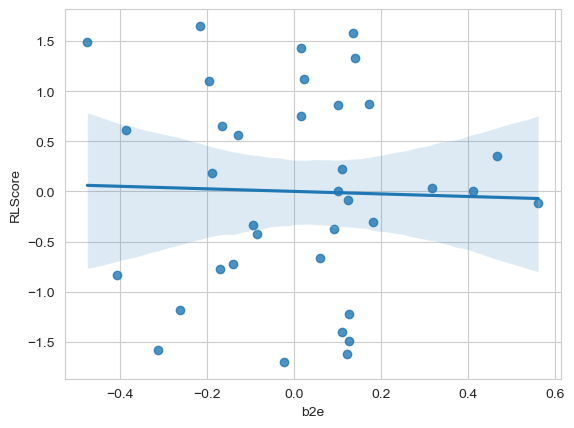

In [357]:
seaborn.regplot(data=df.loc['DefaultA', 'DorsAttnB'], x='b2e', y='RLScore')

In [280]:
# baseline2early Connectivity shift

num of significant 14


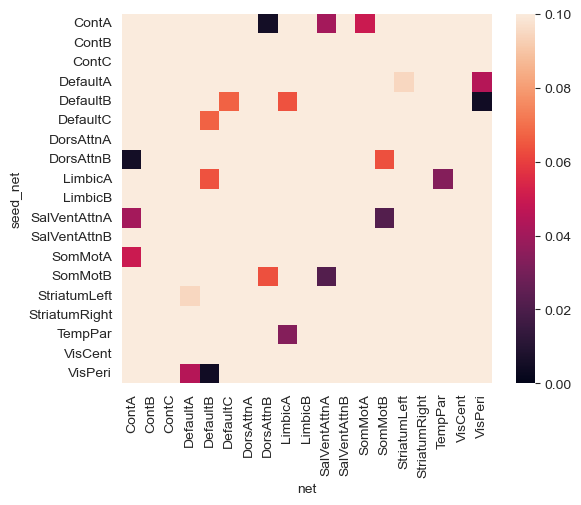

In [412]:
p_b2e = df.round(3).groupby(level=[0,1]).apply(p_value, x='b2e', y='RLScore')
print('num of significant',(p_b2e<.05).sum())

p_b2e = p_b2e.fillna(1)
ax = seaborn.heatmap(p_b2e.unstack(1), vmin=0, vmax=.1, square=True)
fig = ax.get_figure()

In [413]:
name17nets = p_b2e.unstack(1).index.tolist()

In [433]:
# # reordered
# mat, labels = reorder(p_b2e.unstack(1).to_numpy(), name17nets)
# ax = seaborn.heatmap(mat, vmin=0, vmax=.1, square=True,
#                      xticklabels=labels, yticklabels=labels)
# fig = ax.get_figure()
# # fig.savefig("plots/b2e-shift-vs-behavior-17net.png")

<AxesSubplot: xlabel='net', ylabel='seed_net'>

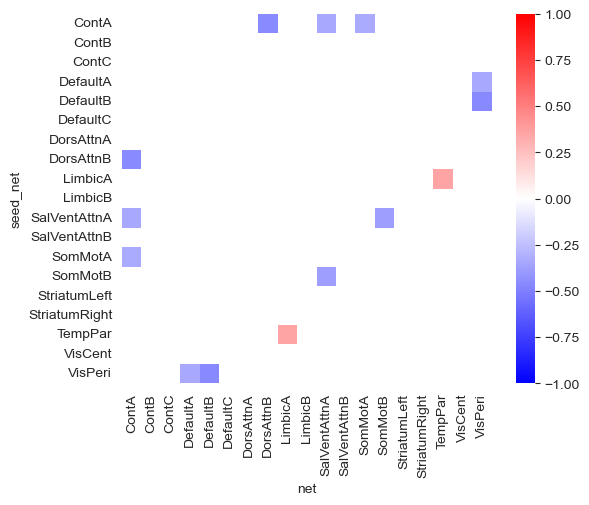

In [435]:
r_b2e = df.round(3).groupby(level=[0,1]).apply(r_value, x='b2e', y='RLScore')
seaborn.heatmap(r_b2e.unstack(1).fillna(1)[p_b2e.unstack(1)<.05],
                vmin=-1, vmax=1, cmap='bwr',square=True,)

In [279]:
# early 2 late Connectivity shift

In [415]:
p_e2l = df.round(3).groupby(level=[0,1]).apply(p_value, x='e2l', y='RLScore')
print('num of significant',(p_e2l<.05).sum())
p_e2l = p_e2l.fillna(1)
p_e2l.unstack(1)

num of significant 14


net,ContA,ContB,ContC,DefaultA,DefaultB,DefaultC,DorsAttnA,DorsAttnB,LimbicA,LimbicB,SalVentAttnA,SalVentAttnB,SomMotA,SomMotB,StriatumLeft,StriatumRight,TempPar,VisCent,VisPeri
seed_net,,,,,,,,,,,,,,,,,,,
ContA,1.000000,0.445428,0.959163,0.578497,0.492953,0.903404,0.207325,0.563257,0.606000,0.894301,0.103835,0.698410,0.210165,0.461841,0.795235,0.564907,0.147179,0.826560,0.542601
ContB,0.445428,1.000000,0.171152,0.255062,0.667449,0.488369,0.402971,0.903177,0.665429,0.364725,0.262165,0.323307,0.310886,0.442232,0.893258,0.349146,0.232141,0.869547,0.912551
ContC,0.959163,0.171152,1.000000,0.066256,0.236516,0.806595,0.464024,0.358142,0.324974,0.404177,0.946714,0.858590,0.997740,0.816745,0.278001,0.170275,0.874794,0.807673,0.139217
DefaultA,0.578497,0.255062,0.066256,1.000000,0.938708,0.108572,0.305687,0.319721,0.212965,0.158650,0.766898,0.570671,0.308517,0.694941,0.109855,0.384831,0.668141,0.413251,0.202533
DefaultB,0.492953,0.667449,0.236516,0.938708,1.000000,0.005992,0.785997,0.459558,0.507877,0.149349,0.682561,0.283572,0.586248,0.303234,0.687855,0.873402,0.808386,0.855966,0.177601
DefaultC,0.903404,0.488369,0.806595,0.108572,0.005992,1.000000,0.570767,0.639199,0.460916,0.066233,0.409801,0.556872,0.660796,0.989032,0.178854,0.574484,0.287598,0.055295,0.769224
DorsAttnA,0.207325,0.402971,0.464024,0.305687,0.785997,0.570767,1.000000,0.305640,0.752681,0.739506,0.097141,0.020386,0.505526,0.409252,0.550223,0.401614,0.965467,0.209722,0.170804
DorsAttnB,0.563257,0.903177,0.358142,0.319721,0.459558,0.639199,0.305640,1.000000,0.874876,0.758008,0.838109,0.038911,0.910024,0.395188,0.649046,0.350753,0.515657,0.483128,0.973344
LimbicA,0.606000,0.665429,0.324974,0.212965,0.507877,0.460916,0.752681,0.874876,1.000000,0.996638,0.613783,0.799954,0.072265,0.924786,0.787837,0.395298,0.330785,0.966913,0.214330


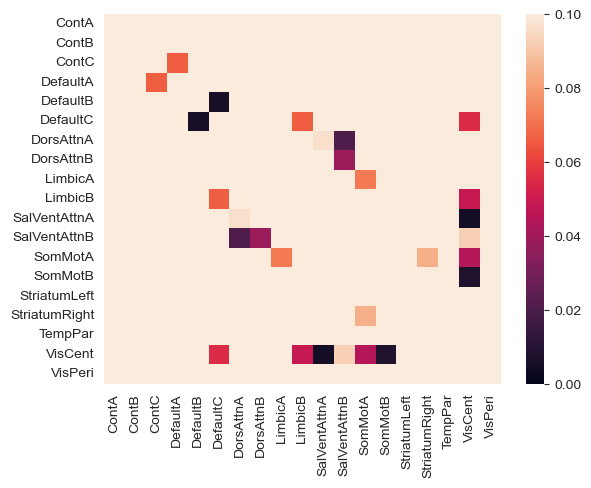

In [437]:
mat, labels = p_e2l.unstack(1).to_numpy(), name17nets

ax = seaborn.heatmap(mat, vmin=0, vmax=.1,
                     xticklabels=labels, yticklabels=labels)
fig = ax.get_figure()
# fig.savefig("plots/e2l-shift-vs-behavior-17net.png")

<AxesSubplot: xlabel='net', ylabel='seed_net'>

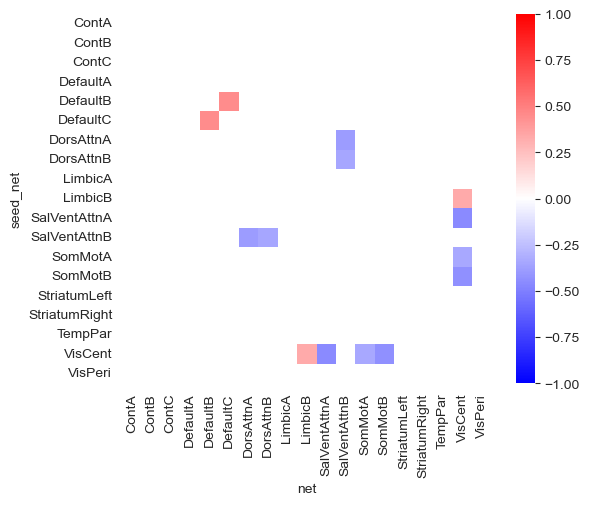

In [436]:
r_e2l = df.round(3).groupby(level=[0,1]).apply(r_value, x='e2l', y='RLScore')
seaborn.heatmap(r_e2l.unstack(1).fillna(1)[p_e2l.unstack(1)<.05],
                vmin=-1, vmax=1, cmap='bwr',square=True)